# Lasso parameter selection and Inductive Conformal Predictor

### 1
Firstly, we'll load the scikit-learn version of the diabetes dataset with load_diabetes

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### 2
Let's split it into training and test sets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=307)

In [19]:
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X_train, y_train)

In [20]:
lasso.score(X_train, y_train)

0.36779324829211146

In [21]:
lasso.score(X_test, y_test)

0.3362814529900525

### 3
As we can see, the raining and test set scores for the default Lasso and the scikit diabetes dataset are 0.367 and 0.336, respectively

In [22]:
np.sum(lasso.coef_ != 0)

3

In [23]:
lasso.coef_

array([  0.        ,  -0.        , 397.79090115,   2.42286963,
         0.        ,   0.        ,  -0.        ,   0.        ,
       292.26659239,   0.        ])

The 3rd, 4th and 9th features. i.e, bmi, bp, and ltg, possibly log of serum triglycerides level are used by the Lasso model.

### 4

We will now load the original (not normalized) diabetes dataset we got from https://trevorhastie.github.io/data.html

In [30]:
diab_original = np.genfromtxt("diabetes.data", skip_header=True)

In [31]:
diab_original

array([[ 59.    ,   2.    ,  32.1   , ...,   4.8598,  87.    , 151.    ],
       [ 48.    ,   1.    ,  21.6   , ...,   3.8918,  69.    ,  75.    ],
       [ 72.    ,   2.    ,  30.5   , ...,   4.6728,  85.    , 141.    ],
       ...,
       [ 60.    ,   2.    ,  24.9   , ...,   4.1271,  95.    , 132.    ],
       [ 36.    ,   1.    ,  30.    , ...,   5.1299,  85.    , 220.    ],
       [ 36.    ,   1.    ,  19.6   , ...,   4.5951,  92.    ,  57.    ]])

In [32]:
X = diab_original[:, 0:-1]

In [34]:
y = diab_original[:, -1]

In [35]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


### 5
Let's split the dataset into training and test sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=307)

In [37]:
lasso = Lasso().fit(X_train, y_train)
print("The training score is: ", lasso.score(X_train, y_train))
print("The test score is: ",lasso.score(X_test, y_test))
print("The number of features used is: ", np.sum(lasso.coef_ != 0))

The training score is:  0.5154674892898614
The test score is:  0.48589838321772183
The number of features used is:  9


### 6
After repeating step no. 3 for the unnormalised dataset, we see that the scores seen here with the default parameters are a little higher than the ones seen in the above normalised dataset, and the features that are used increase drastically from 3 to almost the whole set of features, 9/10. At this point, it might as well be Ridge regression.

### 7
Let's preprocess the dataset using StandarScaler

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
lasso = Lasso().fit(X_train_scaled, y_train)
print("The training score is: ", lasso.score(X_train_scaled, y_train))
print("The test score is: ",lasso.score(X_test_scaled, y_test))
print("The number of features used is: ", np.sum(lasso.coef_ != 0))

The training score is:  0.5178054444563157
The test score is:  0.49007071104495203
The number of features used is:  8


### 8
Repeating the steps from item 3, we see that these results are closer to the results from item 6, with 8 features used instead of 9 and almost the same training and test scores. We would expect the results to be similar to the ones from item 3, since the main difference between the previous results was that the initial one was gotten by training a Lasso on normalized data, while the other one was on data that was not normalized.

This is likely because we used the StandardScaler, which makes the mean of features 0 and variance 1, whereas the already normalized data that we started out with had Normalization done on it.

In [68]:
alphas = [0.000001, 0.00001, 0.0001,0.001,0.01,0.1,1,10,15, 20, 30, 50, 100]
usedCoefs = []
scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter = 100000).fit(X_train_scaled, y_train)
    usedCoefs.append(np.sum(lasso.coef_ != 0))
    scores.append(lasso.score(X_test_scaled, y_test))
print(alphas)
print(usedCoefs)
print(scores)

[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 15, 20, 30, 50, 100]
[10, 10, 10, 10, 10, 10, 8, 4, 3, 3, 2, 0, 0]
[0.4951313427502605, 0.4951311256515436, 0.49512895432459103, 0.4951072014511807, 0.4948855839971581, 0.4934912167778295, 0.49007071104495203, 0.43136227253358117, 0.3906628202321326, 0.34311366679625843, 0.22874632816243756, -0.004709748419508664, -0.004709748419508664]


(-1.0, 1.0)

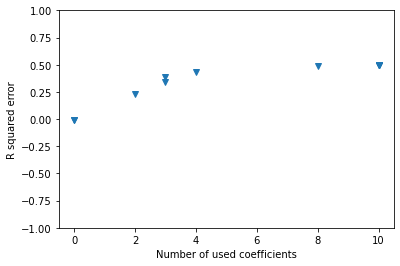

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(usedCoefs, scores, 'v')
plt.xlabel("Number of used coefficients") 
plt.ylabel("R squared error")
plt.ylim(-1, 1)

### 9
Here, we see that the number of used coefficients goes down from 10 all the way to 0 for different alphas, with the corresponding R squared error going from 0.5 to 0. alpha = 30, for which the number of used coefficients are 2, or alpha = 15 or 20, for which number of coefficients are 3, would be preferable as they minimise the error enough (to about 0.25) while not overfitting.

### 10 Param selection using cross-validation

In [71]:
param_grid = {'alpha': [0.000001, 0.00001, 0.0001,0.001,0.01,0.1,1,10,15, 20, 30, 40, 50], 'max_iter': [100000]}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv = 5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 15, 20, 30, 40, 50],
                         'max_iter': [100000]})

In [72]:
grid_search.score(X_test_scaled, y_test)

0.49007071104495203

In [73]:
grid_search.best_estimator_

Lasso(alpha=1, max_iter=100000)

In [74]:
grid_search.best_score_

0.47111670499038694

In [75]:
grid_search.best_params_

{'alpha': 1, 'max_iter': 100000}

As we can see, the cross-validation gives us the best result at alpha = 1 with the test score of 0.49. The score that we got in item 9 might either be because of accident since there was no cross-validation, or because it was overfit. 

### 11 Inductive Conformal Predictor
Now let us implement an inductive conformal predictor based on Lasso by dividing the training set we got in step 5 into a training set proper and a calibration set

In [77]:
X_train_proper, X_cal, y_train_proper, y_cal = train_test_split(X_train, y_train, test_size=99, random_state=307)

In [78]:
X_cal.shape

(99, 10)

Let us first fit the StandardScaler to the training set proper

scaler.fit(X_train_proper)

Now let us scale the training set proper, calibration set, and test set based on this fit

In [80]:
X_train_proper_scaled = scaler.transform(X_train_proper)
X_cal_scaled = scaler.transform(X_cal)
X_test_scaled = scaler.transform(X_test)

In [81]:
grid_search_conformal = GridSearchCV(Lasso(), param_grid, cv = 5)

We'll use GridSearchCV and fit it to the training set proper

In [82]:
grid_search_conformal.fit(X_train_proper_scaled, y_train_proper)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 15, 20, 30, 40, 50],
                         'max_iter': [100000]})

Now let us get the predictions for the calibration set based on this lasso. i.e, y hat

In [83]:
cal_predictions = grid_search.predict(X_cal_scaled)

In [84]:
cal_predictions

array([151.23295369, 219.58465909, 215.8813095 , 142.25922911,
       107.13334653,  65.04396185, 146.37201843, 155.92509467,
       126.76597211, 162.05119461, 122.7368154 ,  86.81228883,
       184.95826597,  41.8313076 , 117.11174947,  62.72754671,
       218.6643225 , 265.45620525, 249.18790427,  77.40800695,
       188.19912327, 202.23468317, 262.45722   , 261.13951468,
       174.72316058, 126.19376632, 220.55171971, 128.35049031,
       203.51136369, 117.81516094, 280.07881095, 100.9235782 ,
        54.6853528 , 139.22181447,  56.24088887, 284.32135025,
       200.74407409,  72.51137888, 180.00347625, 156.71946583,
       259.95611428, 188.65307429, 165.77607668, 122.8743461 ,
       216.38010737, 165.41962805,  90.28543004, 206.49244366,
        69.66124195, 251.62064302, 124.88658926, 173.46992247,
        94.663204  ,  72.16486958, 213.14891474,  71.58888368,
       270.76040473, 207.42579534, 155.24483951, 193.60980522,
       189.51350834, 142.12564344, 225.0255382 ,  74.94

Let us find the alpha_i nonconformity scores for the calibration set

In [86]:
alpha_i = np.absolute(y_cal - cal_predictions)

In [92]:
alpha_i_sorted = np.sort(alpha_i)

In [89]:
m = len(alpha_i)
m

99

For ε = 0.05, k = ceil((1-0.05)(99+1)) = 95 

In [99]:
k = 95
c_5 = alpha_i_sorted[k-1]

In [100]:
c_5

88.77607667623496

Here, we found c as the 95th conformity score (since indexing starts from 0)

The length of prediction intervals for ε = 0.05 will be 2c = 2 * 88.78 = 177.56

For the 20% prediction interval, ε = 0.2, thus, k = ceil((1-0.2)(99+1)) = 80

In [101]:
k = 80
c_20 = alpha_i_sorted[k-1]
c_20

63.00490477472586

For the 20% prediction interval, the length of the interval is 2 * c = 2 * 63 = 126

Now, to find the test error rate for our conformal predictor, let us first find the predicted labels for the test set:

In [102]:
test_predictions = grid_search_conformal.predict(X_test_scaled)

For these predictions, we'll go through each prediction, calculate the prediction interval, and see if the actual label lies inside this interval. We'll count the fraction of predictions that don't lie inside their prediction interval to get the error rate.

In [106]:
error_count_5 = 0
error_count_20 = 0
for i in range(len(test_predictions)):
    prediction = test_predictions[i]
    if(y_test[i] < prediction - c_5 or y_test[i] > prediction + c_5):
        error_count_5 += 1
    if(y_test[i] < prediction - c_20 or y_test[i] > prediction + c_20):
        error_count_20 += 1
print("error count for 20% is",error_count_20)
print("error count for 5% is",error_count_5)

error count for 20% is 30
error count for 5% is 12


In [108]:
error_rate_20 = error_count_20 / len(test_predictions)
error_rate_5 = error_count_5 / len(test_predictions)
print("The error rate for 20% is", error_rate_20)
print("The error rate for 5% is", error_rate_5)

The error rate for 20% is 0.2702702702702703
The error rate for 5% is 0.10810810810810811


As we can see, the error rate for the 20% prediction interval is 0.27, while the error rate for 5% prediction interval is 0.11, as we would expect.